### **Distillation + Quantization**
In this project, we aim to build two models—a larger “teacher” model (BERT) and a smaller “student” model (DistilBERT)—to classify text as either AI-generated or human-written. Our goal is to make both models accurate while optimizing the student model for efficiency, making it suitable for deployment on devices with limited resources.


<h4> <b>Data Preparation</b> </h4>
<h5> Data Sources </h5>
<ol>
  <li> <a href="https://www.kaggle.com/datasets/sunilthite/llm-detect-ai-generated-text-dataset"> LLM - Detect AI Generated Text Dataset </a> </li>
  <li> <a href="https://www.kaggle.com/datasets/thedrcat/daigt-v2-train-dataset"> DAIGT V2 Train Dataset </a> </li>
</ol>

<p>Both of these datasets are combined in a preprocessing step to create a single training dataset.</p>
<p>The merging and formatting process is available in a dedicated <a href="https://www.kaggle.com/code/openmihirpatel/aivsog-dataprep"> Kaggle Notebook for Data Preparation </a>.</p>
<p>The output of this step is a CSV file containing labeled text data for training and validation.</p>

<h3><b>Fine-tuning and Distillation</b></h3>
<h5><b>Fine-tuning</b></h5>
<p>We start with <b>BERT-base</b> as our teacher model. After fine-tuning it on our classification task, BERT can accurately differentiate between AI-generated and human-written text. This fine-tuned model serves as a knowledgeable 'teacher.'</p>

<h5><b>Distillation</b></h5>
<p>We then use <b>DistilBERT-base</b> as our student model. Distillation is the process where the student model learns from the teacher's output, allowing it to achieve similar performance but with reduced complexity and memory usage. We effectively 'compress' the teacher's knowledge into the student model.</p>

<p>More details on this process can be found in our notebook on <a href="https://www.kaggle.com/code/openmihirpatel/finetuning-and-distillation"> Model Distillation and Quantization </a>.</p>


### **Distillation**

**Distillation** is a technique to compress a large, complex model (often called the **teacher model**) into a smaller, faster model (known as the **student model**). This process allows the student model to learn from the output predictions of the teacher model, retaining much of the original accuracy while being more efficient.

The teacher model is trained on a specific task, such as text classification, and is then used to train the student model. The student model learns to mimic the teacher, making it possible to achieve similar accuracy with reduced model size and computational needs.

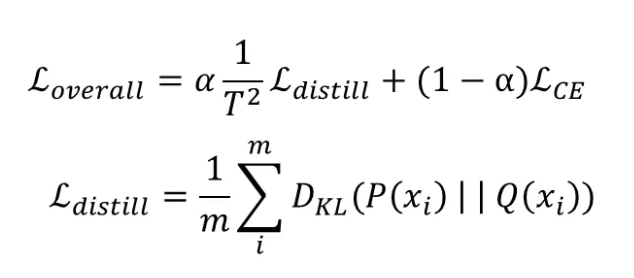

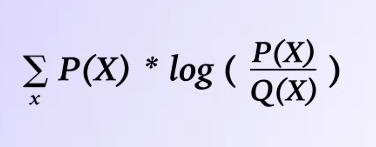

**Benefits**:
- **Improved Efficiency**: Student models are smaller and faster.
- **Retained Performance**: Often achieves accuracy close to the teacher model.
- **Scalable Deployment**: Useful for real-time applications needing faster response times.


### **Quantization**

**Quantization** is a process that reduces the computational complexity and memory usage of a model by compressing it. In essence, quantization converts the model's parameters from higher precision (e.g., 32-bit floats) to lower precision (e.g., 8-bit integers), which decreases the model size and speeds up inference times. Quantization is especially useful in deploying models to edge devices with limited hardware resources since it can lead to faster and more efficient model performance.

**Benefits**:
- **Reduces Model Size**: Decreases the storage needed for the model.
- **Speeds Up Inference**: Reduces the time taken to make predictions.
- **Energy Efficiency**: Useful for low-power devices.


<h5><b>Results Discussion</b></h5>

<p>In the table below, we summarize the key results of our models (original and quantized), comparing them based on accuracy, memory size, and prediction speed. By reviewing these metrics, we gain insights into the trade-offs between model size, speed, and performance.</p>

<table>
  <tr>
    <th>Model Type</th>
    <th>Accuracy</th>
    <th>Loss</th>
    <th>Params</th>
    <th>Size (MB)</th>
    <th>Time (ms)</th>
  </tr>
  <tr>
    <td>BERT-base-uncased</td>
    <td>0.993515</td>
    <td>0.025127</td>
    <td>109.48 M</td>
    <td>438.003 MB</td>
    <td>495.485 ms</td>
  </tr>
  <tr>
    <td>Distilled-BERT-base-uncased</td>
    <td>0.990813</td>
    <td>0.040144</td>
    <td>66.36 M</td>
    <td>265.490 MB</td>
    <td>299.864 ms</td>
  </tr>
  <tr>
    <td>Quantized BERT-base-uncased</td>
    <td>0.997027</td>
    <td>0.019512</td>
    <td>109.48 M</td>
    <td>181.483 MB</td>
    <td>340.033 ms</td>
  </tr>
  <tr>
    <td>Quantized Distilled-BERT-base-uncased</td>
    <td>0.977033</td>
    <td>0.065918</td>
    <td>66.36 M</td>
    <td>138.112 MB</td>
    <td>191.589 ms</td>
  </tr>
</table>